
## Bank Marketing Classification

This code was done as a requirement for MAN 203 of Mapua University. 

#### Objective: 

The goal of the project is to make a model that will classify if a client will subscribe a term deposit.

#### Source:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


#### Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


#### Attribute Information:

##### Input variables:

bank client data:
1) age (numeric)
2) job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3) marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4) education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5) default: has credit in default? (categorical: 'no','yes','unknown')
6) housing: has housing loan? (categorical: 'no','yes','unknown')
7) loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:

8) contact: contact communication type (categorical: 'cellular','telephone')
9) month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10) day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11) duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:

12) campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13) pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14) previous: number of contacts performed before this campaign and for this client (numeric)
15) poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes

16) emp.var.rate: employment variation rate - quarterly indicator (numeric)
17) cons.price.idx: consumer price index - monthly indicator (numeric)
18) cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19) euribor3m: euribor 3 month rate - daily indicator (numeric)
20) nr.employed: number of employees - quarterly indicator (numeric)

##### Output variable (desired target):
21)  y - has the client subscribed a term deposit? (binary: 'yes','no')


#### Relevant Papers:

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS. [bank.zip]



#### Citation Request:

This dataset is public available for research. The details are described in [Moro et al., 2014].
Please include this citation if you plan to use this database:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

https://archive.ics.uci.edu/ml/datasets/Bank%2BMarketing

In [2]:

!pip install pandas

     |████████████████████████████████| 11.3 MB 4.8 MB/s            �██████████████████████▏| 11.0 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 46.4 MB/s            


In [3]:
!pip install matplotlib

     |████████████████████████████████| 11.2 MB 4.5 MB/s            
     |████████████████████████████████| 3.1 MB 55.1 MB/s            
     |████████████████████████████████| 1.1 MB 35.1 MB/s            
     |████████████████████████████████| 890 kB 43.2 MB/s            


In [4]:
!pip install matplotlib seaborn

     |████████████████████████████████| 292 kB 4.9 MB/s            
     |████████████████████████████████| 38.1 MB 62.6 MB/s            


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

#the version used are:
#pandas==1.3.5
#numpy==1.21.5
#seaborn==0.11.2
#matplotlib==3.5.1


pandas==1.3.5
numpy==1.21.5
seaborn==0.11.2


In [8]:
# CSV Data were read from the folder. separate texts using delimeter   
missing=["No Info","None","none"] 
df_Bank_Data = pd.read_csv("bank-additional-full.csv",na_values=missing,sep=";")



In [9]:
#output first 5 rows just to see the first 5 values of the dataset
df_Bank_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
df_Bank_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

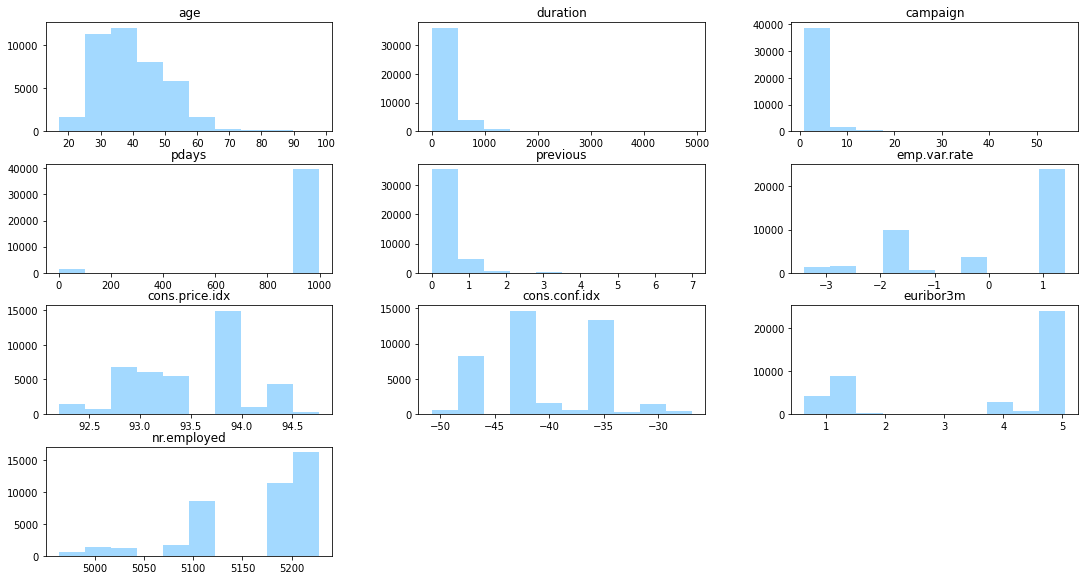

In [11]:
f, axes = plt.subplots(1, 12, figsize=(15,8))
f.tight_layout()
font={'weight' : 'bold',
        'size': 12}


df_Bank_Data.hist(figsize=(100,100),color='#A3D9FF',ax=axes[0], grid=False)

<AxesSubplot:xlabel='age'>

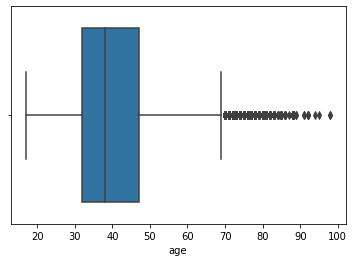

In [16]:
sns.boxplot(df_Bank_Data["age"])




<AxesSubplot:xlabel='duration'>

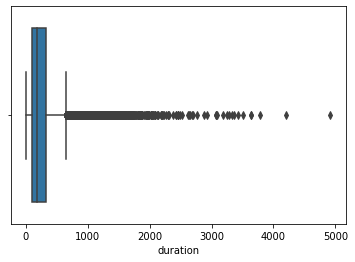

In [17]:
sns.boxplot(df_Bank_Data["duration"])


<AxesSubplot:xlabel='campaign'>

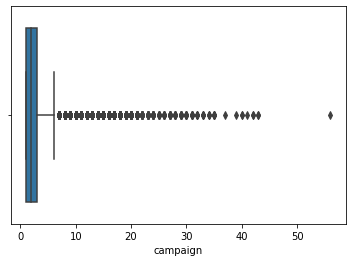

In [18]:
sns.boxplot(df_Bank_Data["campaign"])


<AxesSubplot:xlabel='pdays'>

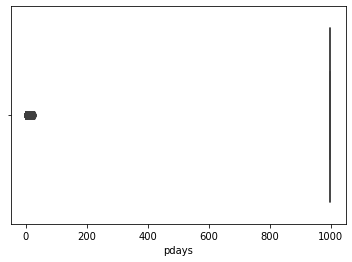

In [19]:
sns.boxplot(df_Bank_Data["pdays"])


<AxesSubplot:xlabel='previous'>

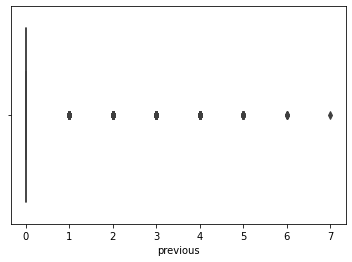

In [20]:
sns.boxplot(df_Bank_Data["previous"])

<AxesSubplot:xlabel='emp.var.rate'>

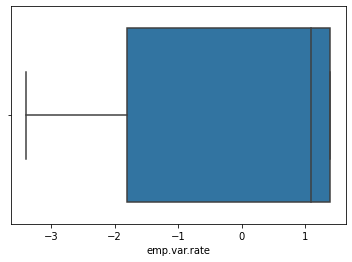

In [21]:
sns.boxplot(df_Bank_Data["emp.var.rate"])

<AxesSubplot:xlabel='cons.price.idx'>

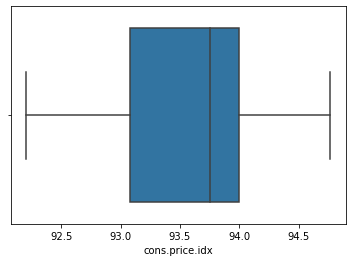

In [22]:
sns.boxplot(df_Bank_Data["cons.price.idx"])

<AxesSubplot:xlabel='cons.conf.idx'>

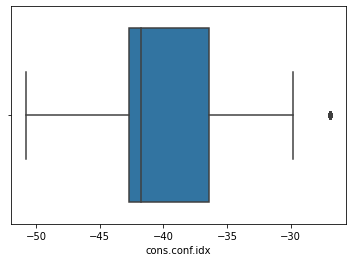

In [23]:
sns.boxplot(df_Bank_Data["cons.conf.idx"])

<AxesSubplot:xlabel='euribor3m'>

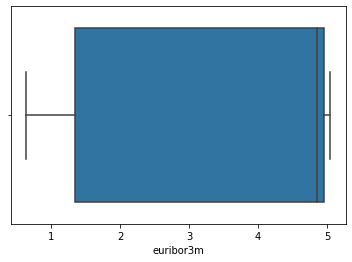

In [24]:
sns.boxplot(df_Bank_Data["euribor3m"])

<AxesSubplot:xlabel='nr.employed'>

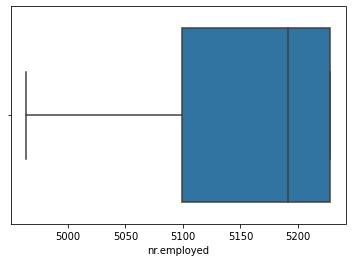

In [25]:
sns.boxplot(df_Bank_Data["nr.employed"])

In [11]:
df_Bank_Data.mean(numeric_only=True)

age                 40.024060
duration           258.285010
campaign             2.567593
pdays              962.475454
previous             0.172963
emp.var.rate         0.081886
cons.price.idx      93.575664
cons.conf.idx      -40.502600
euribor3m            3.621291
nr.employed       5167.035911
dtype: float64

In [12]:
df_Bank_Data.median(numeric_only= True)

age                 38.000
duration           180.000
campaign             2.000
pdays              999.000
previous             0.000
emp.var.rate         1.100
cons.price.idx      93.749
cons.conf.idx      -41.800
euribor3m            4.857
nr.employed       5191.000
dtype: float64

In [13]:
df_Bank_Data.std(numeric_only= True)

age                10.421250
duration          259.279249
campaign            2.770014
pdays             186.910907
previous            0.494901
emp.var.rate        1.570960
cons.price.idx      0.578840
cons.conf.idx       4.628198
euribor3m           1.734447
nr.employed        72.251528
dtype: float64

In [14]:
df_Bank_Data.max(numeric_only = True) - df_Bank_Data.min(numeric_only = True)

age                 81.000
duration          4918.000
campaign            55.000
pdays              999.000
previous             7.000
emp.var.rate         4.800
cons.price.idx       2.566
cons.conf.idx       23.900
euribor3m            4.411
nr.employed        264.500
dtype: float64

In [15]:
df_Bank_Data.quantile([0, 0.25, 0.50, 0.75,1])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0.00,17.0,0.0,1.0,0.0,0.0,-3.4,92.201,-50.8,0.634,4963.6
0.25,32.0,102.0,1.0,999.0,0.0,-1.8,93.075,-42.7,1.344,5099.1
0.50,38.0,180.0,2.0,999.0,0.0,1.1,93.749,-41.8,4.857,5191.0
0.75,47.0,319.0,3.0,999.0,0.0,1.4,93.994,-36.4,4.961,5228.1
1.00,98.0,4918.0,56.0,999.0,7.0,1.4,94.767,-26.9,5.045,5228.1


In [16]:
from scipy.stats import skew, skewtest
variable= df_Bank_Data['age']

In [17]:
s= skew(variable)
zscore, pvalue = skewtest(variable)

In [18]:
print('Skewness %0.3f z-score %0.3f p-value %0.3f' % (s,zscore, pvalue))

Skewness 0.785 z-score 57.755 p-value 0.000


In [19]:
from scipy.stats import kurtosis, kurtosistest
variable =  df_Bank_Data['age']

In [20]:
k= kurtosis(variable)
zscore, pvalue = kurtosistest(variable)

In [21]:
print('Kurtosis %0.3f z-score %0.3f p-value %0.3f' % (k, zscore, pvalue))

Kurtosis 0.791 z-score 23.859 p-value 0.000


In [22]:
pcts=[0,0.25,0.5,0.75,1]

In [23]:
bankdataset_binned = pd.concat([pd.qcut(df_Bank_Data.iloc[:, 0], pcts, precision=1),
                         pd.qcut(df_Bank_Data.iloc[:, 1], pcts, precision=1),
                         pd.qcut(df_Bank_Data.iloc[:, 2], pcts, precision=1),
                         pd.qcut(df_Bank_Data.iloc[:, 3], pcts, precision=1)], 
                        join ='outer', axis = 1)


TypeError: unsupported operand type(s) for -: 'str' and 'str'